In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
df= pd.read_csv("C:/Users/DELL/Desktop/House/train.csv")
dt= pd.read_csv("C:/Users/DELL/Desktop/House/test.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


df.info()
dt.info()

In [6]:
train_id =df['Id']
test_id = dt['Id']
df.drop('Id',axis=1,inplace=True)
dt.drop('Id',axis=1,inplace=True)
print(df.shape,dt.shape)

(1460, 80) (1459, 79)


In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

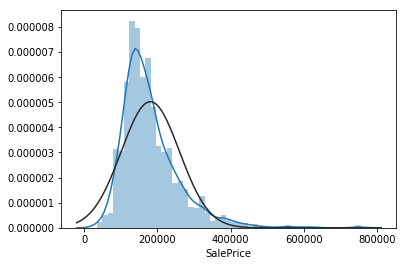

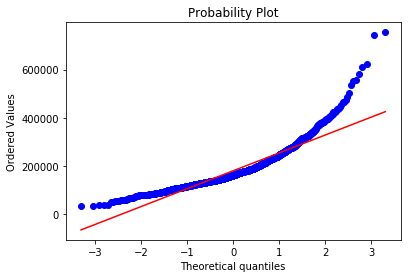

In [10]:
plt.figure(figsize=(6,4))
sns.distplot(df['SalePrice'],fit=norm)
plt.figure(figsize=(6,4))
res=stats.probplot(df['SalePrice'],plot=plt)


In [11]:
df['SalePrice']=np.log(df['SalePrice'])

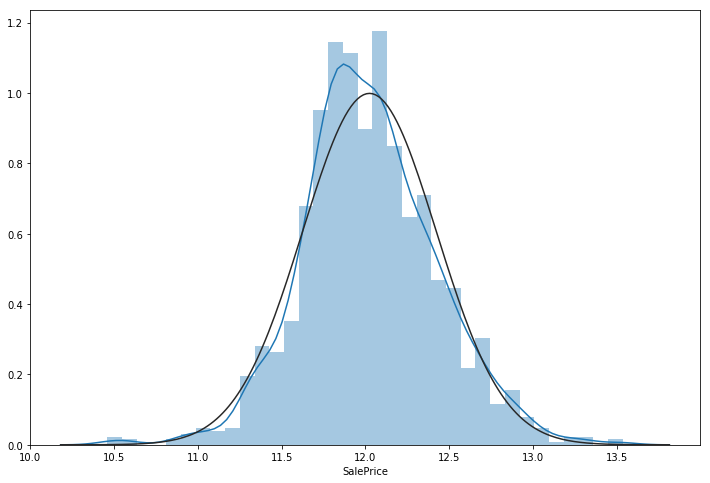

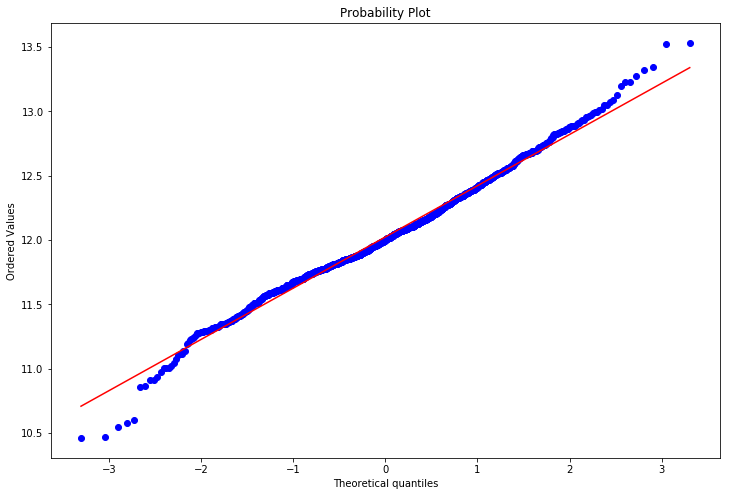

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(df['SalePrice'],fit=norm)
plt.figure(figsize=(12,8))
res=stats.probplot(df['SalePrice'],plot=plt)

In [13]:
feature_num = df.select_dtypes(include=[np.number])
feature_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
feature_cat = df.select_dtypes(include=[np.object])
feature_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
correlation = feature_num.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


(37.5, -0.5)

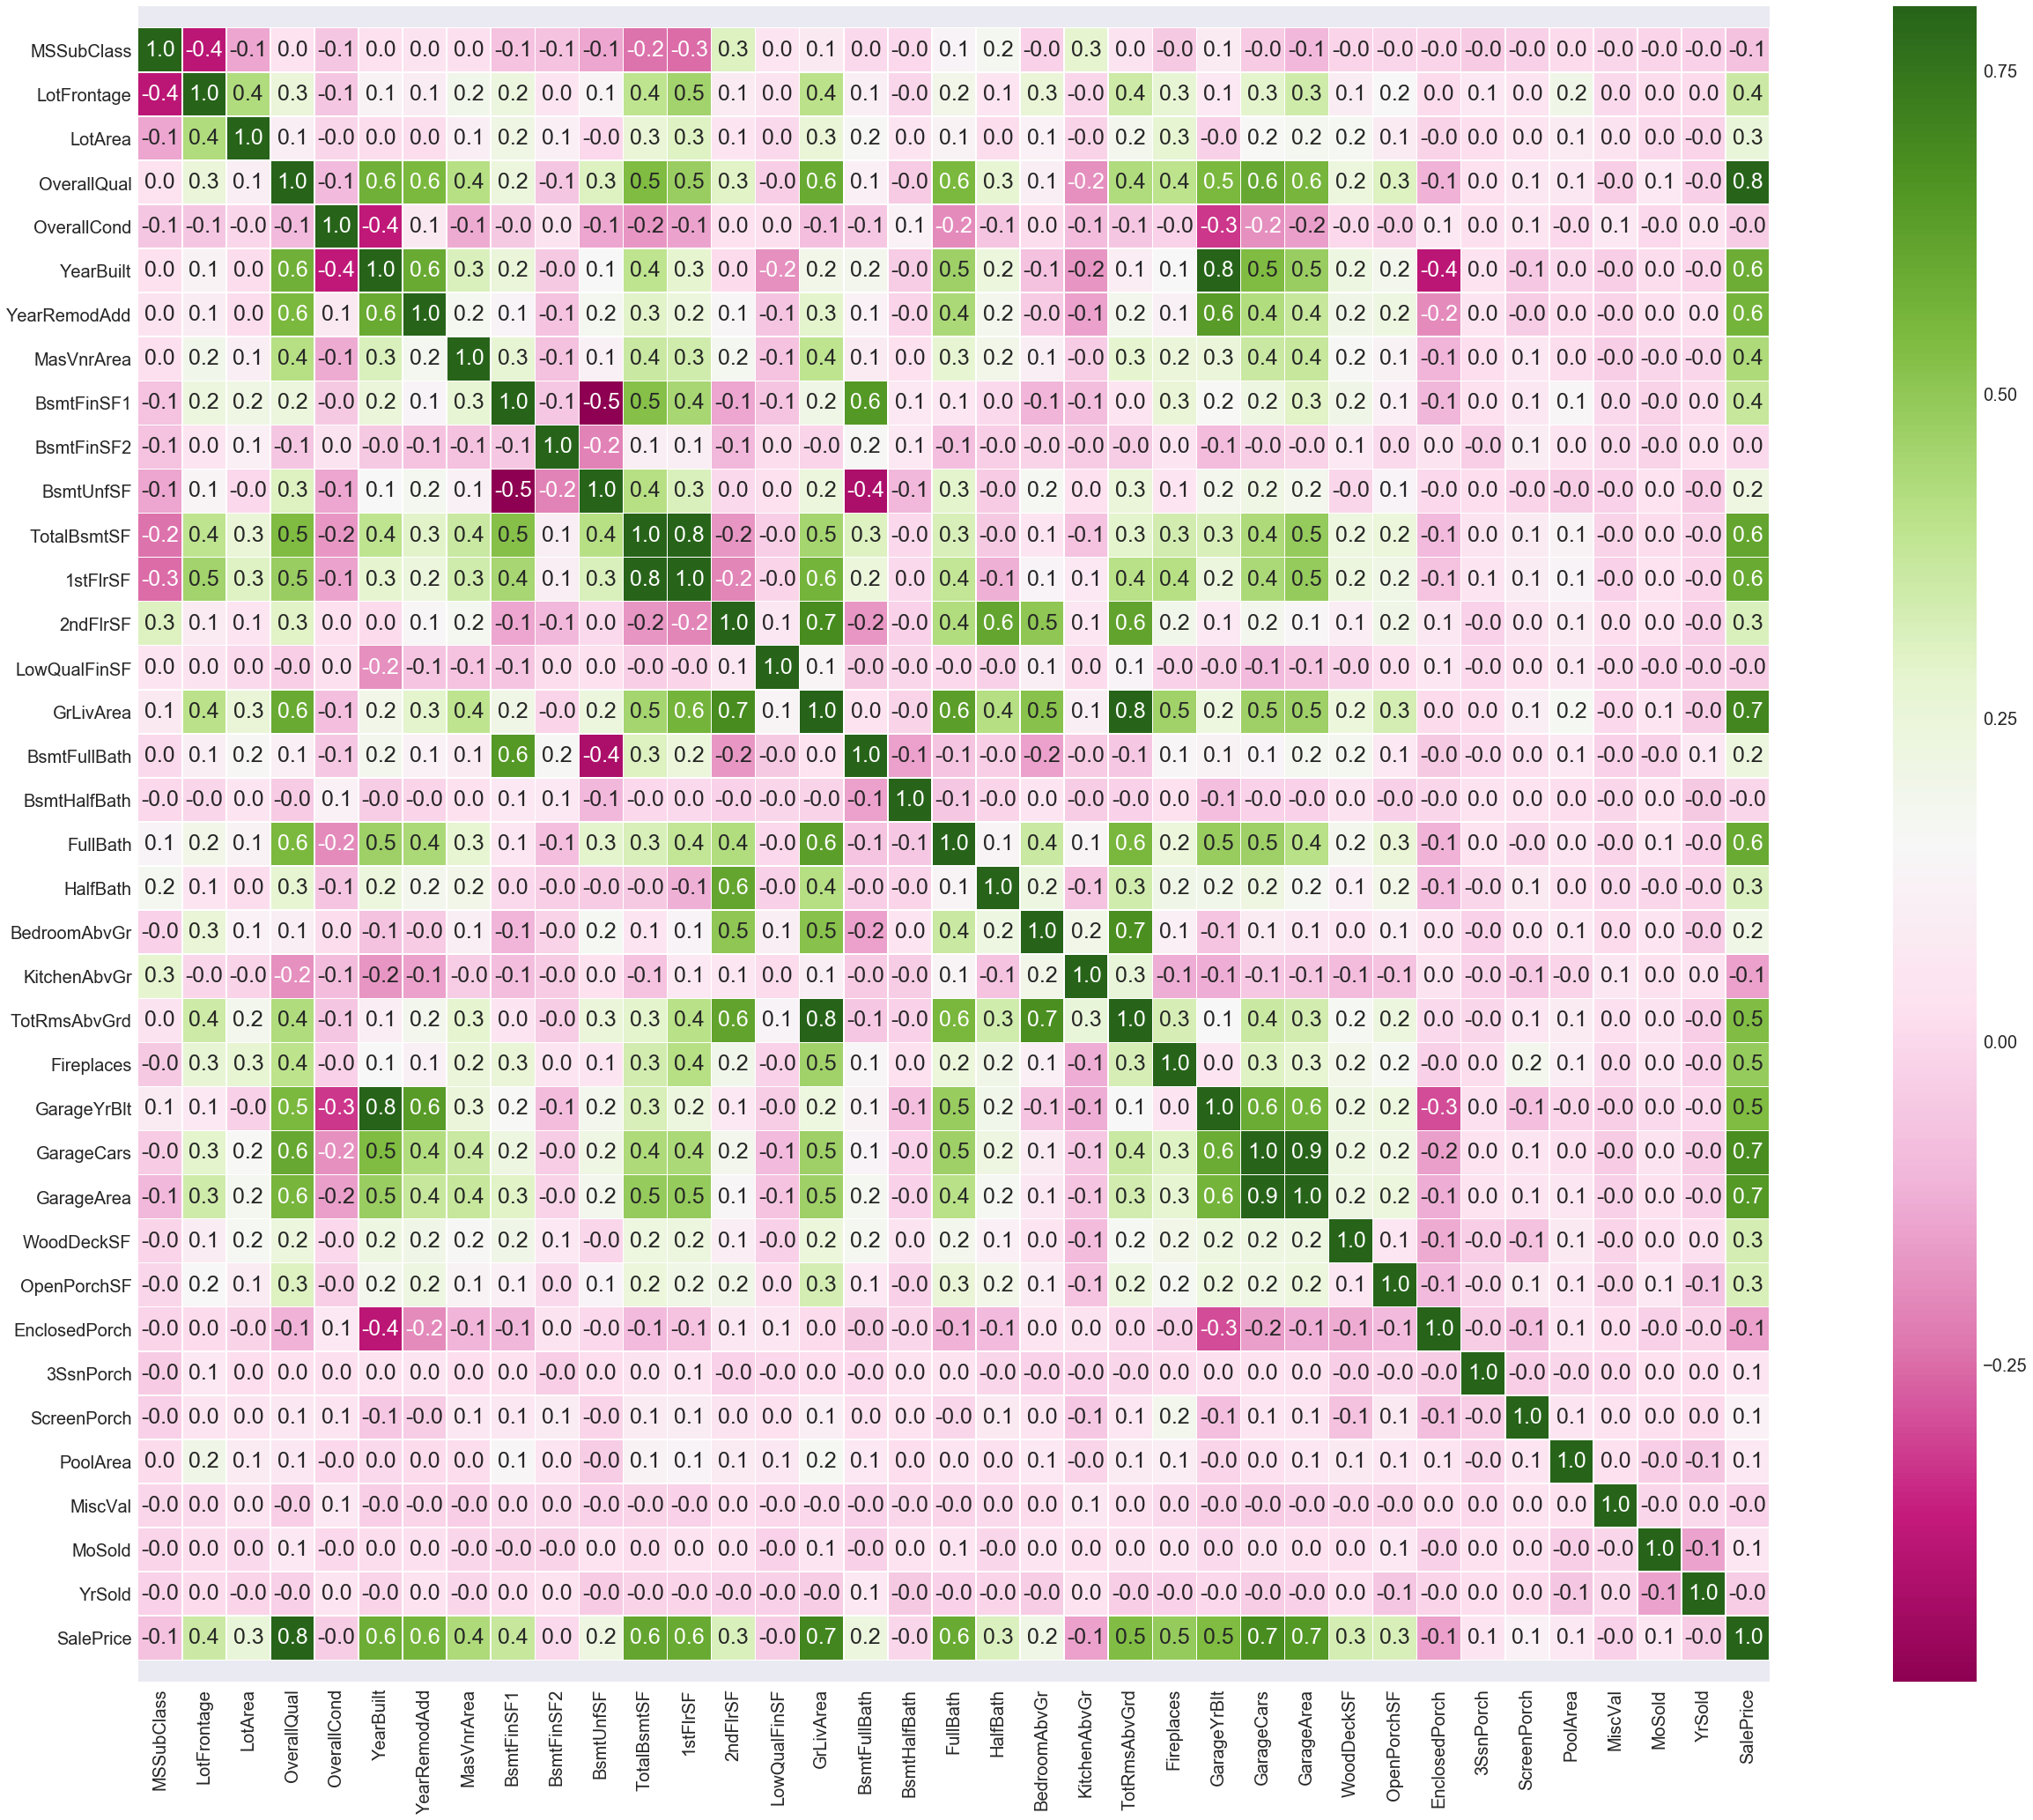

In [16]:
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(feature_num.corr(), square = True, vmax = .8, annot = True, 
                 annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')


(11.5, -0.5)

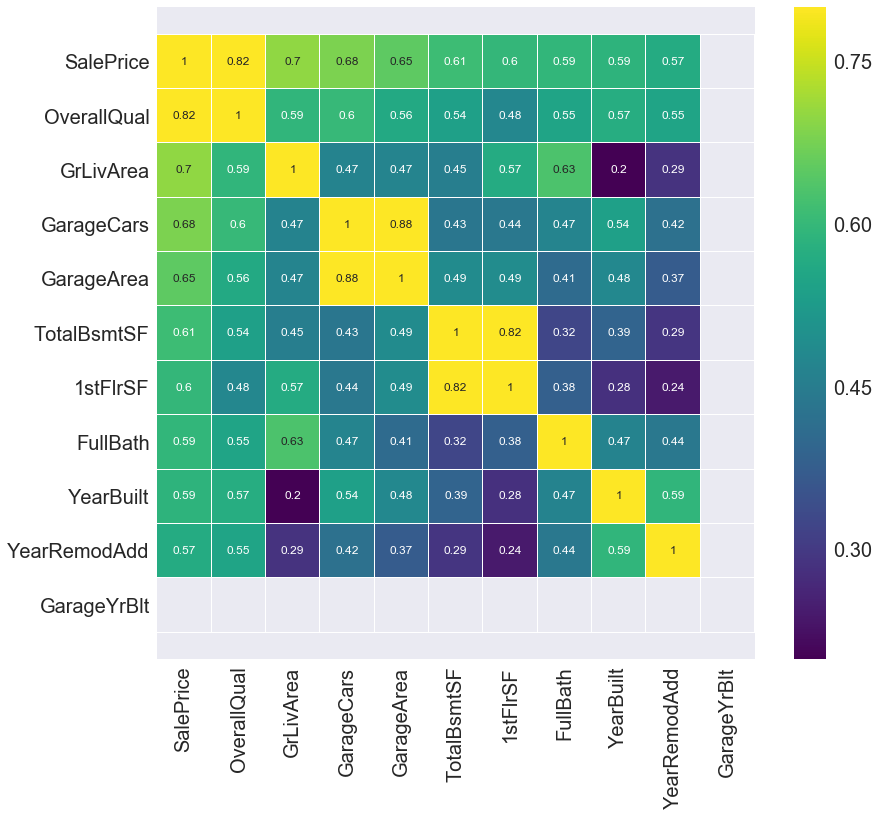

In [17]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize = [14,12])
sns.heatmap(cm, square = True, vmax = 0.8, annot = True, cmap = 'viridis', linewidths=0.01,
            xticklabels = cols.values, yticklabels = cols.values, linecolor = 'white', annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


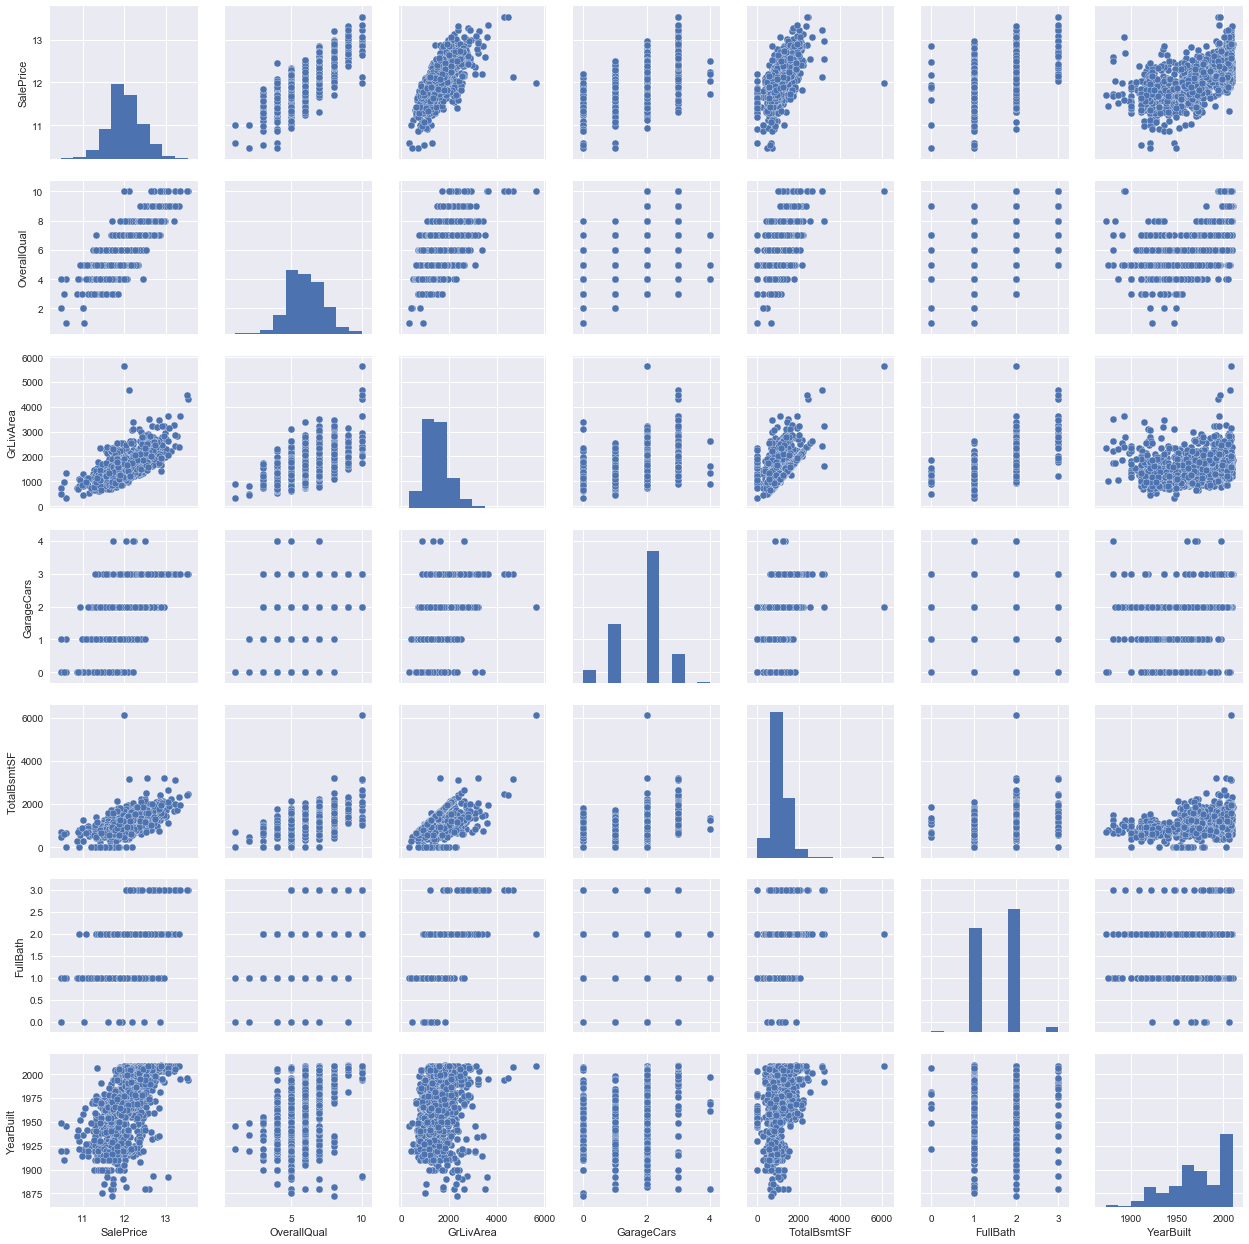

In [18]:
#Here we can see how each feature is correlated with SalePrice.
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();


In [19]:
sns.scatterplot(x = df['GarageCars'], y = df['SalePrice'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

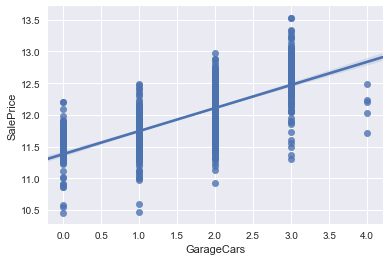

In [20]:
sns.regplot(x = df['GarageCars'], y = df['SalePrice'], scatter = True, fit_reg = True)

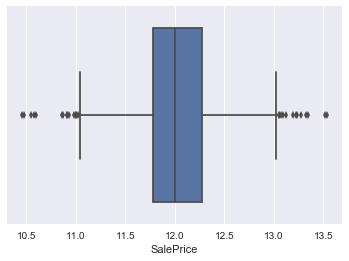

In [21]:
sns.boxplot(df['SalePrice'])

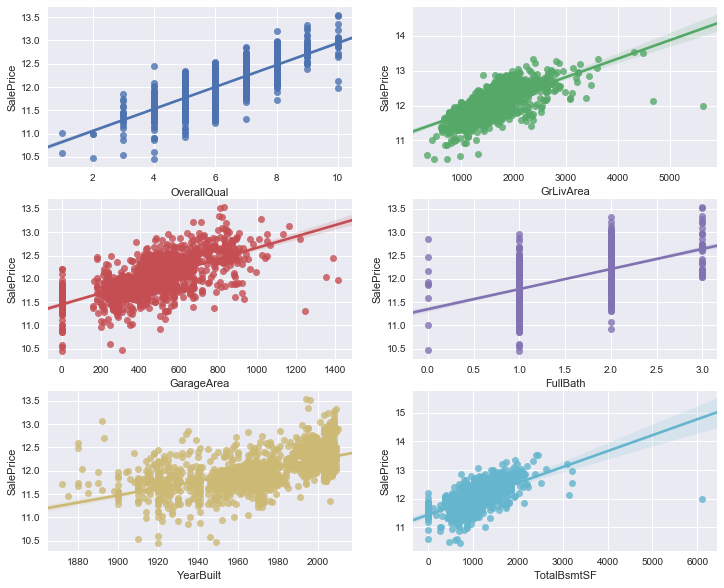

In [22]:
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(ncols = 2, nrows = 3, figsize=(12,10))
sns.regplot(x = df['OverallQual'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = df['GarageArea'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = df['FullBath'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax4)
sns.regplot(x = df['YearBuilt'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax5)
sns.regplot(x = df['TotalBsmtSF'], y = df['SalePrice'], scatter = True, fit_reg = True, ax = ax6)

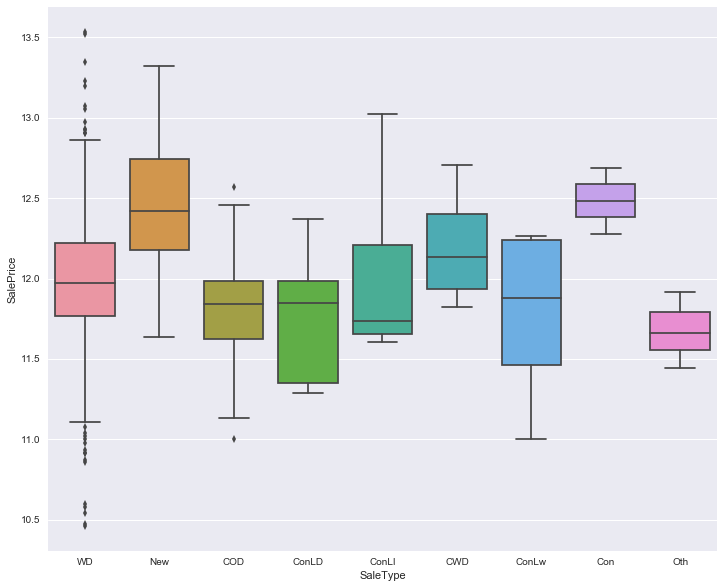

In [23]:
f,ax = plt.subplots(figsize=[12,10])
sns.boxplot(x = df['SaleType'], y = df['SalePrice'])

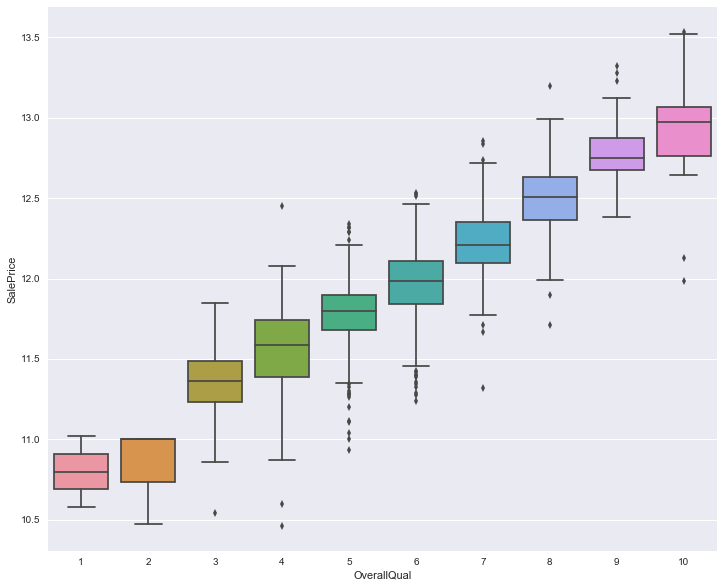

In [24]:
f,ax = plt.subplots(figsize=[12,10])
fig = sns.boxplot(x = df['OverallQual'], y = df['SalePrice'])

In [25]:
first_quartile = df['SalePrice'].quantile(0.25)
third_quartile = df['SalePrice'].quantile(0.75)
IQR = third_quartile-first_quartile
new_boundary = third_quartile+3*IQR
#train.drop(train[train['SalePrice']>new_boundary].index, axis = 0, inplace = True)

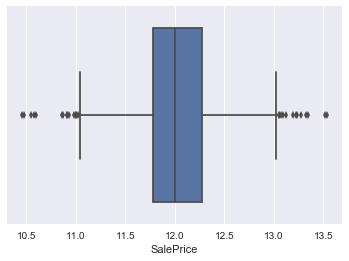

In [26]:
sns.boxplot(df['SalePrice'])

In [27]:
total = pd.concat((df, dt)).reset_index(drop=True)
print(total.shape)

(2919, 80)


In [28]:
missing = total.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
missing 

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

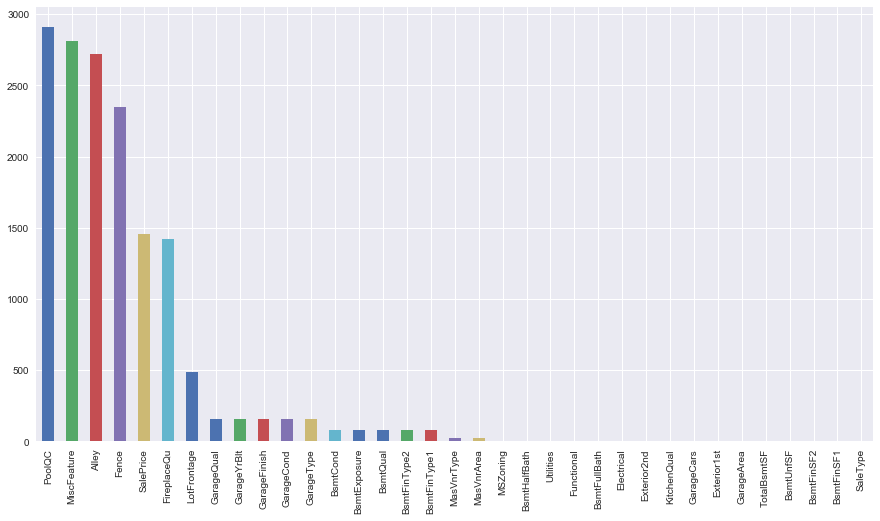

In [29]:
plt.figure(figsize=(15,8))
missing.plot.bar()

In [30]:

feature_tot_num = total.select_dtypes(include=[np.number])
missing_tot_numeric = feature_tot_num.isnull().sum().sort_values(ascending=False)
missing_tot_numeric_percent = (feature_tot_num.isnull().sum()/feature_tot_num.isnull().count()).sort_values(ascending=False)
missing_num_data = pd.concat([missing_tot_numeric, missing_tot_numeric_percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_num_data.index.name =' Numeric Feature'
missing_num_data.head(20)
print(feature_tot_num.shape)


(2919, 37)


<Figure size 1080x576 with 0 Axes>

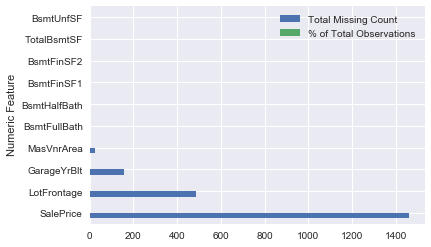

In [31]:
missing_num_data = missing_num_data[missing_num_data>0]

plt.figure(figsize=(15,8))
missing_num_data.head(10).plot.barh()

In [32]:
feature_tot_cat = total.select_dtypes(include=[np.object])
missing_tot_cat = feature_tot_cat.isnull().sum().sort_values(ascending=False)
missing_tot_cat_percent = (feature_tot_cat.isnull().sum()/feature_tot_cat.isnull().count()).sort_values(ascending=False)
missing_cat_data = pd.concat([missing_tot_cat, missing_tot_cat_percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_cat_data.index.name =' Categorical Feature'
missing_cat_data.head(25)
print(feature_tot_cat.shape)

(2919, 43)


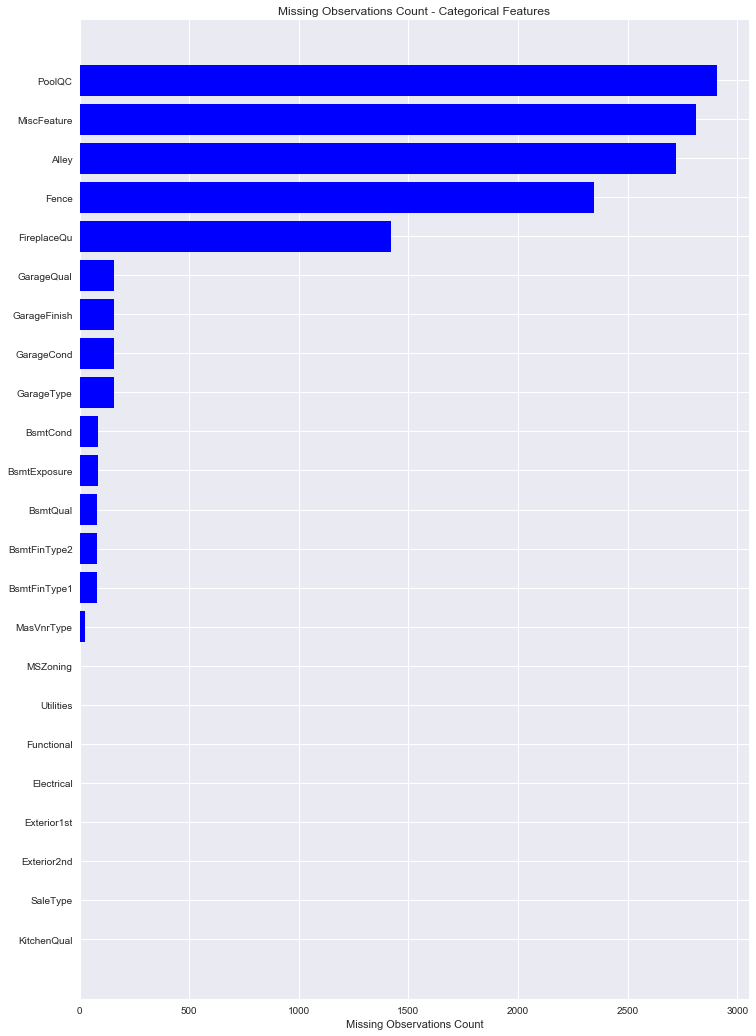

In [33]:
missing_tot_cat = feature_tot_cat.isnull().sum(axis=0).reset_index()
missing_tot_cat.columns = ['column_name', 'missing_count']
missing_tot_cat = missing_tot_cat.loc[missing_tot_cat['missing_count']>0]
missing_tot_cat = missing_tot_cat.sort_values(by='missing_count')

ind = np.arange(missing_tot_cat.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_tot_cat.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_tot_cat.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

In [34]:
feature_tot_num = feature_tot_num.fillna(feature_tot_num.median())

In [35]:
feature_tot_cat = pd.get_dummies(feature_tot_cat)
feature_tot_cat.shape
str(feature_tot_cat.isnull().values.sum())

'0'

In [36]:
total = pd.concat([feature_tot_cat,feature_tot_num],axis=1)
total.shape

(2919, 289)

In [37]:
train = total.iloc[: 1460, :]
test = total.iloc[1460: , :]
print(train.shape,test.shape)

(1460, 289) (1459, 289)


In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [39]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,train.SalePrice,test_size = 0.3,random_state= 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 289), (438, 289), (1022,), (438,))

In [40]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())


rmse on train 1.2948389139643748e-12
rmse on test 2.30316877404204e-12


In [42]:
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 1.2948389139643748e-12
rmse on train 2.30316877404204e-12


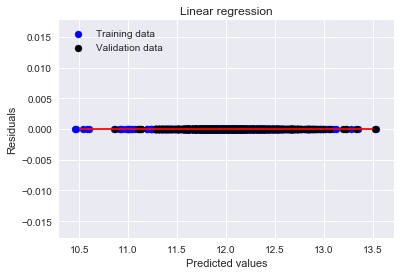

In [43]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

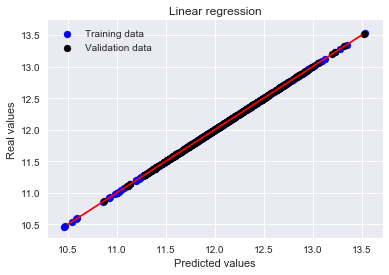

In [44]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
test = test.drop('SalePrice', axis=1)


In [ ]:
Xgb_regressor = XGBRegressor()
Xgb_regressor.fit(X, y)